In [34]:
%pip install ucimlrepo
import ucimlrepo
from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
# fetch dataset


Note: you may need to restart the kernel to use updated packages.


In [33]:
# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)



In [38]:
# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
X = X.drop(['Domain', 'URL', 'TLD' , 'Title'], axis=1)
y = phiusiil_phishing_url_website.data.targets



In [39]:
import pandas as pd
data = X.join(y)
data = data.dropna()


In [40]:
X

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,1,0,0,1,34,20,28,119,0,124
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,0,1,50,9,8,39,0,217
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,0,1,10,2,7,42,2,5
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,0,1,1,1,3,27,15,22,1,31
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,0,1,0,1,51,7,21,187,2,191
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,0,1,0,0,50,1,7,88,0,31
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,0,0,0,1,27,10,30,58,2,67
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,0,0,0,3,0,0,0


In [41]:
non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode these columns
X_encoded = pd.get_dummies(X, columns=non_numeric_columns)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

caler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

c:\Users\pyro5\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Score: 1.0
Testing Score: 1.0


In [45]:
# Get the feature importance array
feature_importances = clf.feature_importances_

In [46]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:10]

[(0.22257763341209852, 'URLSimilarityIndex'),
 (0.13897006946640805, 'NoOfExternalRef'),
 (0.13409851964197553, 'LineOfCode'),
 (0.0989703386346978, 'NoOfSelfRef'),
 (0.07658342164478936, 'NoOfImage'),
 (0.06327890589666671, 'NoOfJS'),
 (0.04512035810789237, 'NoOfCSS'),
 (0.03623238322676041, 'HasSocialNet'),
 (0.031895162882970805, 'HasCopyrightInfo'),
 (0.025077068549574196, 'HasDescription')]

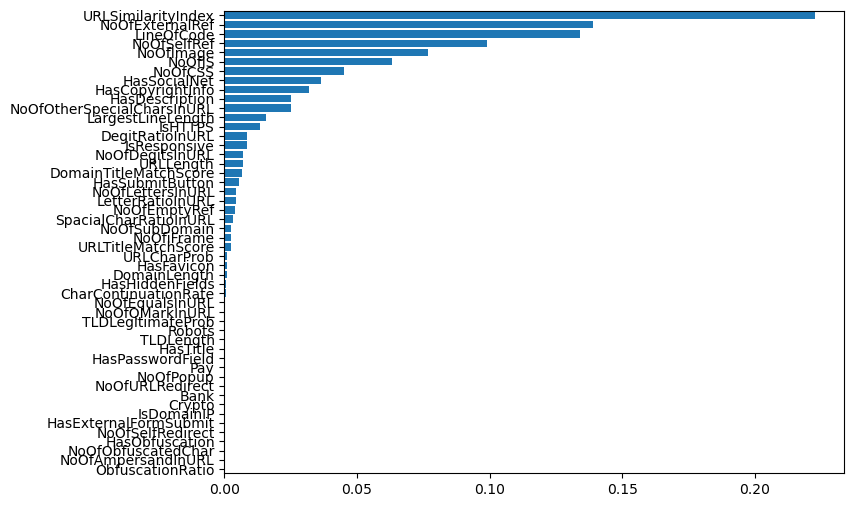

In [47]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()